In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
mushroom_data = pd.read_csv('mushroom_cleaned.csv')
mushroom_data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,mush_class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [3]:
mushroom_class = mushroom_data.mush_class
mushroom_features = mushroom_data.drop('mush_class', axis=1)

In [4]:
mushroom_class

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: mush_class, Length: 54035, dtype: int64

In [5]:
mushroom_features

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [6]:
x = mushroom_features
y = mushroom_class

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=3)

In [10]:
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_random_forest.fit(x_train, y_train)

RandomForestClassifier()

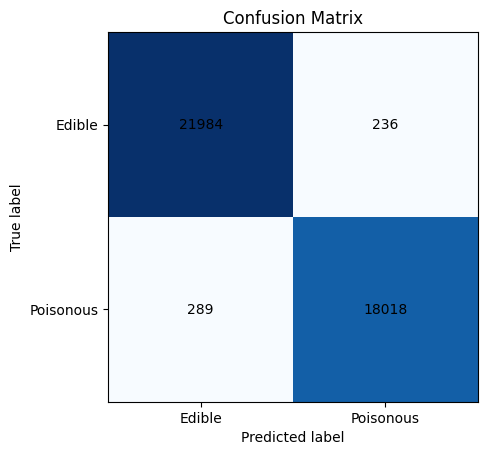

True Positives: 21984
True Negatives: 18018
False Positives: 236
False Negatives: 289
Test accuracy: 0.9870456732548671


In [11]:
############# BY ############# BY ############# BY ############# BY ############# BY #################
############# CHAT ########### CHAT ########### CHAT ########### CHAT ########### CHAT ###############
############# GPT ############ GPT ############ GPT ############ GPT ############ GPT ################
# Predictions
y_pred = model_random_forest.predict(x_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
labels = ['Edible', 'Poisonous']
conf_matrix = np.array([[tp, fp], [fn, tn]])

fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Loop over data dimensions and create text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

ax.set_title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Output counts
print(f'True Positives: {tp}')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'Test accuracy: {test_accuracy}')